# **Project Name**    - Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce



##### **Project Type**    - Unsupervised, Collaborative Filtering
##### **Contribution**    - Individual
##### **Team Member 1 - S Bhavish**


# **Project Summary -**

In today’s fast-paced digital retail world, e-commerce platforms generate massive volumes of transactional data. This data holds valuable insights into customer behavior, purchasing patterns, and product preferences. The “Shopper Spectrum” project is designed to extract meaningful insights from such data, segment customers intelligently using RFM analysis, and provide accurate product recommendations using collaborative filtering techniques. This end-to-end pipeline combines exploratory data analysis (EDA), unsupervised learning, and recommendation systems, all presented in an intuitive Streamlit web application.

The project begins with data preprocessing and cleansing, focusing on removing incomplete entries, cancelled transactions, and invalid purchases. This ensures that the dataset reflects only genuine customer activity. Following this, exploratory data analysis is performed to understand key patterns — such as top purchasing countries, bestselling products, monthly sales trends, and distribution of transaction values.

The core of the customer intelligence component lies in RFM analysis — a method that segments customers based on Recency (how recently a customer made a purchase), Frequency (how often they purchase), and Monetary (how much they spend). The RFM features are standardized using StandardScaler, and KMeans clustering is applied to group customers into actionable segments. The Elbow Method and Silhouette Score guide the optimal number of clusters, and each cluster is interpreted based on its RFM behavior. Segments include “High-Value,” “Regular,” “Occasional,” and “At-Risk” customers. These insights can directly support marketing personalization, retention campaigns, and loyalty programs.

The second core component is the product recommendation engine, which uses item-based collaborative filtering. A customer-product matrix is built using transaction data, and cosine similarity is calculated between products. This allows the system to recommend top N similar products based on the purchasing patterns of other users — even without customer profiling or product metadata. For example, if a customer shows interest in a vintage mug, the system can recommend other mugs or related accessories often bought by similar users.

The entire solution is deployed using Streamlit, providing a lightweight, interactive web interface. The app has two modules:

Product Recommendation Module – where users can input a product name and get similar product suggestions.

Customer Segmentation Module – where users can input RFM values and predict the segment to which a customer belongs.

Behind the scenes, pre-trained models (kmeans_model.pkl, scaler.pkl, and item_similarity.pkl) are used for fast, real-time prediction. The interface is designed to be beginner-friendly yet powerful enough to provide business-ready insights.

In conclusion, “Shopper Spectrum” demonstrates how machine learning and recommendation systems can be applied practically in e-commerce to understand customers better and boost sales through personalization. This project is ideal for those exploring unsupervised learning, real-time recommendation engines, and end-to-end deployment of data science solutions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Streamlit Link**

Provide Streamlit link


# **Problem Statement**


**The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# **Dataset Collection & Understanding**


In [1]:
import pandas as pd

# Load your main dataset
df = pd.read_csv("online_retail.csv", encoding='ISO-8859-1')

# Drop null descriptions and remove duplicates
product_map = df[['StockCode', 'Description']].dropna().drop_duplicates()

# Save to CSV
product_map.to_csv("product_code_to_name.csv", index=False)

print("✅ product_code_to_name.csv generated successfully!")



✅ product_code_to_name.csv generated successfully!


# **Data Preprocessing**

In [2]:
# Remove rows with missing CustomerID
df = df[df['CustomerID'].notnull()]

# Exclude cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# **Exploratory Data Analysis (EDA)**

C:\Users\sbhav\AppData\Local\Temp\ipykernel_11620\2928479849.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate')['TotalPrice'].resample('M').sum().plot(title='Monthly Sales')


<Axes: title={'center': 'Monthly Sales'}, xlabel='InvoiceDate', ylabel='Description'>

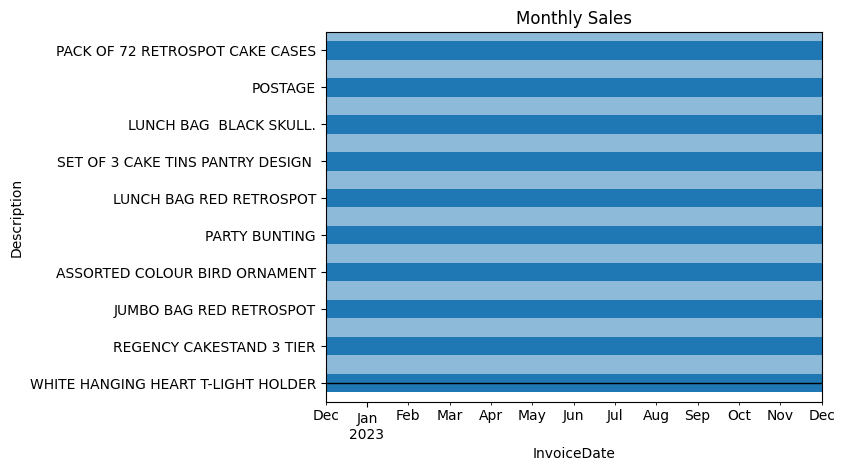

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries by transaction count
df['Country'].value_counts().head(10).plot(kind='bar', title='Top Countries by Transactions')

# Top-selling products
df['Description'].value_counts().head(10).plot(kind='barh', title='Top Selling Products')

# Transaction volume over time
df.set_index('InvoiceDate')['TotalPrice'].resample('M').sum().plot(title='Monthly Sales')

# Distribution of TotalPrice
sns.histplot(df['TotalPrice'], bins=100, kde=True)


# **RFM Feature Engineering**

In [4]:
import datetime as dt

# Snapshot date = 1 day after last purchase
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Group by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


# **Normalize RFM + KMeans Clustering**

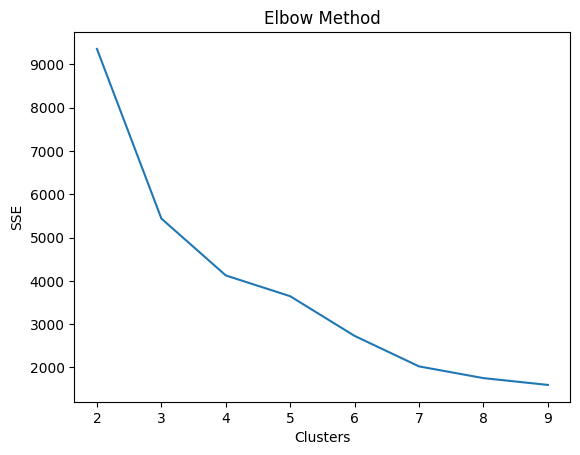

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Normalize RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Elbow Method
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()


In [6]:
# Choose optimal K (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Label Clusters (manually based on RFM means)
cluster_map = rfm.groupby('Cluster').mean()
print(cluster_map)


           CustomerID     Recency  Frequency       Monetary
Cluster                                                    
0        15287.739791   42.412472   4.136752    1563.782438
1        15351.976766  247.312268   1.552974     556.665949
2        15128.614583   13.406250  34.739583   21702.508229
3        15446.571429    6.714286  65.428571  184143.690000


# **Product Recommendation System (Item-based Collaborative Filtering)**

In [7]:
# Create Customer-Item Matrix
customer_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(customer_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=customer_item_matrix.columns, columns=customer_item_matrix.columns)

def get_similar_products(stock_code, top_n=5):
    similar_scores = item_similarity_df[stock_code].sort_values(ascending=False)[1:top_n+1]
    return similar_scores


# **Save Models for Streamlit**

In [8]:
import joblib

# Save clustering model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save similarity matrix
item_similarity_df.to_pickle('item_similarity.pkl')


# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***